<a href="https://colab.research.google.com/github/RicAntonio/Hourly-Energy-Consumption/blob/main/Modelos_Hourly_Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargamos el Dataset del csv que sacamos de la Data de kaggle.json

In [14]:
# Cargar el dataset
data = pd.read_csv('pjm_hourly_est.csv', parse_dates=['Datetime'], index_col='Datetime')

# Manejo de valores faltantes: rellenar hacia adelante
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)  # Relleno hacia atrás si es necesario

# Verificar si quedan valores faltantes
print("Valores faltantes por columna después del preprocesamiento:")
print(data.isnull().sum())

# Seleccionar columnas para el modelo
features = ['AEP', 'COMED']
target = 'PJM_Load'

# Eliminar filas con valores faltantes en las columnas seleccionadas como último recurso
data.dropna(subset=features + [target], inplace=True)

# Dividir en características (X) y objetivo (y)
X = data[features]
y = data[target]

# Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verificar valores faltantes en los datos procesados
print("\n¿Hay valores faltantes en X_train o X_test?")
print(f"X_train contiene NaN: {np.isnan(X_train).any()}")
print(f"X_test contiene NaN: {np.isnan(X_test).any()}")


Valores faltantes por columna después del preprocesamiento:
AEP         0
COMED       0
DAYTON      0
DEOK        0
DOM         0
DUQ         0
EKPC        0
FE          0
NI          0
PJME        0
PJMW        0
PJM_Load    0
dtype: int64

¿Hay valores faltantes en X_train o X_test?
X_train contiene NaN: False
X_test contiene NaN: False


<ipython-input-14-1fc5471e8b0a>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
<ipython-input-14-1fc5471e8b0a>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Relleno hacia atrás si es necesario


MODELO DE REGRESION

In [15]:
# Modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("\nResultados del Modelo de Regresión Lineal:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R2: {r2_score(y_test, y_pred_lr):.2f}")

# Modelo de Bosques Aleatorios
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\nResultados del Modelo de Bosques Aleatorios:")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R2: {r2_score(y_test, y_pred_rf):.2f}")



Resultados del Modelo de Regresión Lineal:
MSE: 6300541.61
R2: 0.00

Resultados del Modelo de Bosques Aleatorios:
MSE: 6294698.68
R2: 0.00


MODELO DE BOSQUES ALEATORIOS

In [16]:
# Modelo de Bosques Aleatorios
from sklearn.ensemble import RandomForestRegressor

# Entrenar el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluación
print("\nResultados del Modelo de Bosques Aleatorios:")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R2: {r2_score(y_test, y_pred_rf):.2f}")



Resultados del Modelo de Bosques Aleatorios:
MSE: 6294698.68
R2: 0.00


COMPARACION DE METRICAS COMO MSE Y R2 Y SU ViSUALIZACION

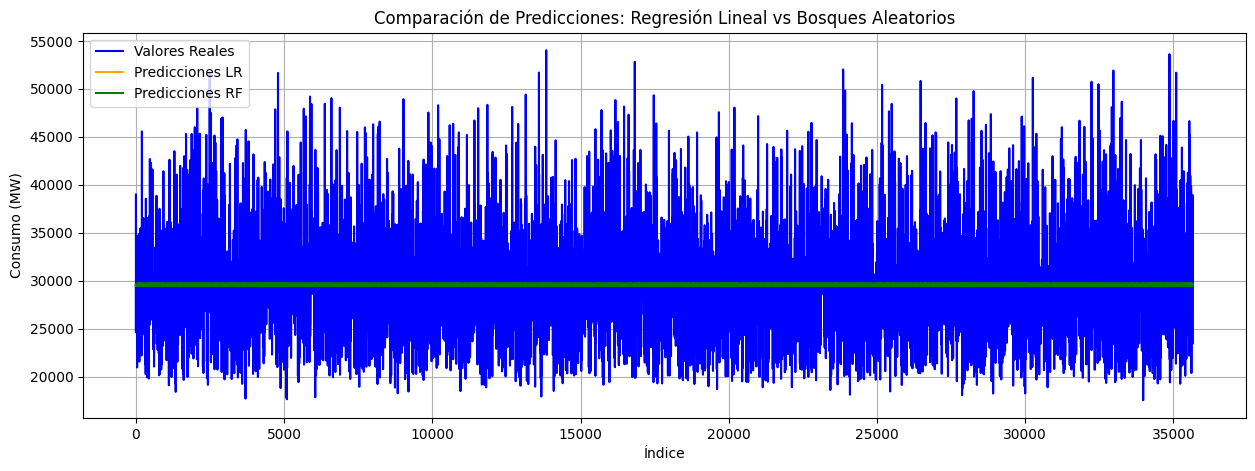

In [17]:
import matplotlib.pyplot as plt

# Comparar predicciones
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Valores Reales', color='blue')
plt.plot(y_pred_lr, label='Predicciones LR', color='orange')
plt.plot(y_pred_rf, label='Predicciones RF', color='green')
plt.legend()
plt.title("Comparación de Predicciones: Regresión Lineal vs Bosques Aleatorios")
plt.xlabel("Índice")
plt.ylabel("Consumo (MW)")
plt.grid()
plt.show()


PARA EXPORTAR EL MODELO CON JOBLIB O CON PICKLE PARA SU USO FUTURO

In [18]:
import joblib
joblib.dump(rf_model, 'mejor_modelo_regresion.pkl')


['mejor_modelo_regresion.pkl']